In [1]:
from PIL import Image
import os
from glob import glob
from tqdm import tqdm
import json
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import albumentations as A
import copy
from collections import Counter
from scipy.stats import mode
import cv2

In [2]:
dataroot = '/opt/ml/segmentation/input/mmseg/annotations/validation'
mask_paths = glob(f'{dataroot}/*')
i = 0

(512, 512)
Counter({0: 236551, 8: 25090, 1: 503})
Counter({0: 14680, 8: 1471, 1: 66, 4: 58, 2: 26, 7: 26, 5: 25, 6: 21, 3: 11})


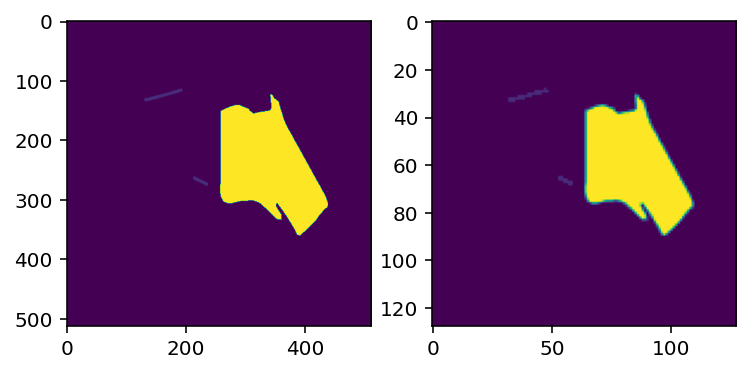

In [3]:
img = Image.open(mask_paths[i])
print(img.size)

origin = np.array(copy.deepcopy(img))
downsize = 128
downsc = np.array(img.resize((downsize,downsize)))

plt.subplot(1,2,1)
plt.imshow(origin)

plt.subplot(1,2,2)
plt.imshow(downsc)


cnt_origin = Counter(origin.flatten())
cnt_downsc = Counter(downsc.flatten())
print(cnt_origin)
print(cnt_downsc)

(512, 512)
Counter({0: 236551, 8: 25090, 1: 503})
Counter({0: 3705, 8: 384, 1: 7})


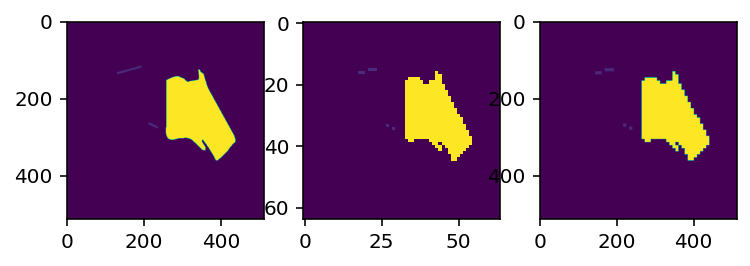

In [4]:
img = Image.open(mask_paths[i])
i += 1
origin = np.array(copy.deepcopy(img))

output_size = 64
transform = A.Compose([A.Resize(output_size, output_size)])

retransform = A.Compose([A.Resize(512, 512)])


image = np.zeros((1,1,1))

transformed = transform(image=image, mask=origin)
downsc = transformed['mask']

retransformed = retransform(image=image, mask=downsc)
upsam = retransformed['mask']
print(upsam.shape)


plt.subplot(1,3,1)
plt.imshow(origin)

plt.subplot(1,3,2)
plt.imshow(downsc)

plt.subplot(1,3,3)
plt.imshow(upsam)

cnt_origin = Counter(np.array(origin).flatten())
cnt_downsc = Counter(np.array(downsc).flatten())
print(cnt_origin)
print(cnt_downsc)

In [5]:
a = np.array([[2,13,13,23],[1,2,2,2]]).flatten()
print(a)
mode(a)[0][0]

[ 2 13 13 23  1  2  2  2]


2

In [18]:
def mode_resampling(origin: np.array, kernel=3):
    if 1 not in origin:
        return None
    mask = copy.deepcopy(origin)
    for i in tqdm(range(0, 512,3)):
        for j in range(0,512,3):
            curr = mask[i:i+kernel, j:j+kernel]
            if 1 in curr:
                continue
            mode_val = mode(origin[i:i+kernel, j:j+kernel].flatten())[0][0]
            # mode_val = mode(curr.flatten())[0][0]
            mask[i:i+kernel, j:j+kernel] = np.ones_like(curr) * mode_val
    
    return mask

In [22]:
i += 1
print(mask_paths[i-1])
img = Image.open(mask_paths[i-1])
origin = np.array(copy.deepcopy(img))

resam = mode_resampling(origin)
print(resam.shape)

plt.clf()
plt.subplot(1,2,1)
plt.imshow(origin)

plt.subplot(1,2,2)
plt.imshow(resam)
# Image.fromarray(resam).save('/opt/ml/segmentation/AI_Tech_segmentation_competition/pre/EDA/hihihi.jpg')
fdir = '/opt/ml/segmentation/AI_Tech_segmentation_competition/pre/EDA/hihihi.png'
cv2.imwrite(fdir, resam)

cnt_origin = Counter(np.array(origin).flatten())
cnt_downsc = Counter(np.array(resam).flatten())

print(cnt_origin)
print(cnt_downsc)

/opt/ml/segmentation/input/mmseg/annotations/validation/0480.png


AttributeError: 'NoneType' object has no attribute 'shape'

Counter({0: 155584, 10: 106560})


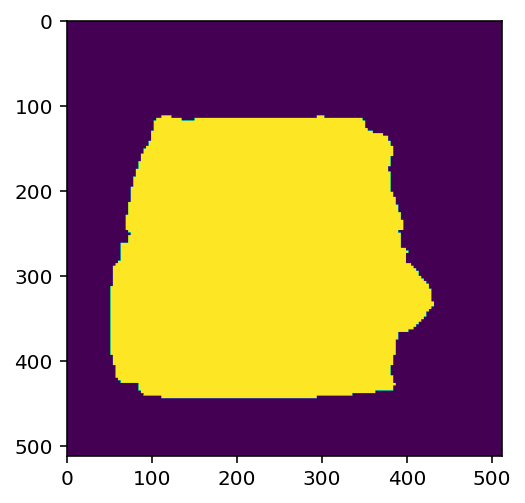

In [15]:
saved = np.array(Image.open(fdir))
plt.imshow(saved)
cnt = Counter(saved.flatten())
print(cnt)

In [9]:
resamroot = '/opt/ml/segmentation/input/mmseg/annotations/training_resam'
resams = glob(os.path.join(resamroot, '*'))
i = -1

/opt/ml/segmentation/input/mmseg/images/training/0577.jpg
/opt/ml/segmentation/input/mmseg/annotations/training_resam/0577.png


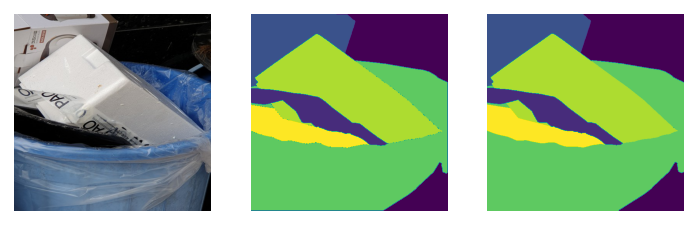

In [10]:
i += 1
saved = np.array(Image.open(resams[i]))


imageroot = '/opt/ml/segmentation/input/mmseg/images/training'
annotroot = '/opt/ml/segmentation/input/mmseg/annotations/training'
fname = resams[i].split('/')[-1].split('.')[0]
imname = os.path.join( imageroot, fname + '.jpg')
print(imname)
plt.subplot(1,3,1)
plt.axis('off')
plt.imshow(Image.open(imname))

plt.subplot(1,3,2)
plt.axis('off')
plt.imshow(Image.open(os.path.join(annotroot, fname + '.png')))

plt.subplot(1,3,3)
plt.axis('off')
plt.imshow(saved)

cnt = Counter(saved.flatten())
print(resams[i])


In [38]:
print(cnt)

Counter({0: 201895, 2: 60249})
